# Extract light curve

In [21]:
import numpy as np
from astropy.io import fits

In [107]:
import os

datadir = os.getcwd()

datafile4_lc = '/tess2018292075959-s0004-0000000270577175-0124-s/tess2018292075959-s0004-0000000270577175-0124-s_lc.fits'
datafile4_tp = '/tess2018292075959-s0004-0000000270577175-0124-s/tess2018292075959-s0004-0000000270577175-0124-s_tp.fits'

datafile5_lc = '/tess2018319095959-s0005-0000000270577175-0125-s/tess2018319095959-s0005-0000000270577175-0125-s_lc.fits'
datafile5_tp = '/tess2018319095959-s0005-0000000270577175-0125-s/tess2018319095959-s0005-0000000270577175-0125-s_tp.fits'

datafile6_lc = '/tess2018349182459-s0006-0000000270577175-0126-s/tess2018349182459-s0006-0000000270577175-0126-s_lc.fits'
datafile6_tp = '/tess2018349182459-s0006-0000000270577175-0126-s/tess2018349182459-s0006-0000000270577175-0126-s_tp.fits'

datafile7_lc = '/tess2019006130736-s0007-0000000270577175-0131-s/tess2019006130736-s0007-0000000270577175-0131-s_lc.fits'
datafile7_tp = '/tess2019006130736-s0007-0000000270577175-0131-s/tess2019006130736-s0007-0000000270577175-0131-s_tp.fits'

In [130]:
data4 = fits.getdata(datadir + datafile4_lc)
data5 = fits.getdata(datadir + datafile5_lc)
data6 = fits.getdata(datadir + datafile6_lc)
data7 = fits.getdata(datadir + datafile7_lc)

# Let's do some work on the light curves:
- remove nans in TIME and PDCSAP_FLUX
- remove non-zero quality flags
- remove event 1421 and 1424 in the first sector (sector 4) 

In [177]:
def remove_nans_quality(time, flux, quality):
    nan_mask_time = ~np.isnan(time)
    nan_mask_flux = ~np.isnan(flux)
    zero_quality  = quality == 0
    mask_comb = nan_mask_time & nan_mask_flux & zero_quality
    return [time[mask_comb], flux[mask_comb], quality[mask_comb]]

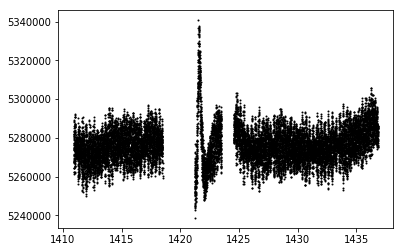

In [178]:
t4 = remove_nans_quality(data4['TIME'], data4['PDCSAP_FLUX'], data4['QUALITY'])[0]
f4 = remove_nans_quality(data4['TIME'], data4['PDCSAP_FLUX'], data4['QUALITY'])[1]

plt.scatter(t4, f4, s=1, c='k')
plt.show()

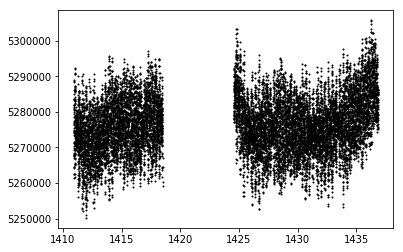

In [179]:
mask_instrumental = (1421 < t4) & (t4 < 1424)

t4 = t4[~mask_instrumental]
f4 = f4[~mask_instrumental]

plt.scatter(t4, f4, s=1, c='k')
plt.show()

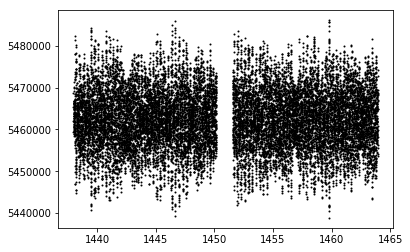

In [163]:
t5 = remove_nans_quality(data5['TIME'], data5['PDCSAP_FLUX'], data5['QUALITY'])[0]
f5 = remove_nans_quality(data5['TIME'], data5['PDCSAP_FLUX'], data5['QUALITY'])[1]

plt.scatter(t5, f5, s=1, c='k')
plt.show()

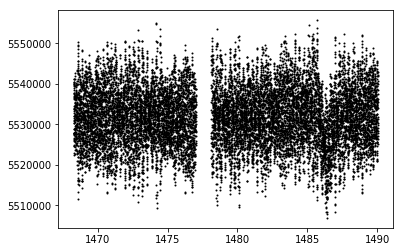

In [164]:
t6 = remove_nans_quality(data6['TIME'], data6['PDCSAP_FLUX'], data6['QUALITY'])[0]
f6 = remove_nans_quality(data6['TIME'], data6['PDCSAP_FLUX'], data6['QUALITY'])[1]

plt.scatter(t6, f6, s=1, c='k')
plt.show()

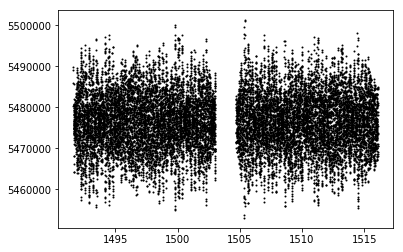

In [165]:
t7 = remove_nans_quality(data7['TIME'], data7['PDCSAP_FLUX'], data7['QUALITY'])[0]
f7 = remove_nans_quality(data7['TIME'], data7['PDCSAP_FLUX'], data7['QUALITY'])[1]

plt.scatter(t7, f7, s=1, c='k')
plt.show()

In [182]:
def div_median(flux):
    return flux / np.median(flux)

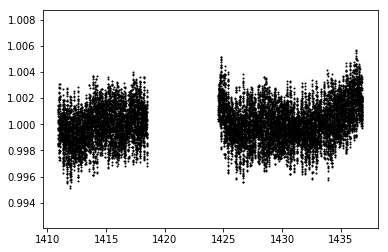

In [183]:
plt.scatter(t4, div_median(f4), s=1, c='k')
plt.show()

In [184]:
def comb(arr1, arr2, arr3, arr4):
    tmp1 = arr1.tolist()
    tmp2 = arr2.tolist()
    tmp3 = arr3.tolist()
    tmp4 = arr4.tolist()
    return tmp1 + tmp2 + tmp3 + tmp4

In [185]:
t = comb(t4, t5, t6, t7)
f = comb(div_median(f4), div_median(f5), div_median(f6), div_median(f7))

In [206]:
#The sectors 4 - 7 started approx. at the following BTJD time:
sectors = [1410.9, 1437.8, 1465.2, 1491.6]

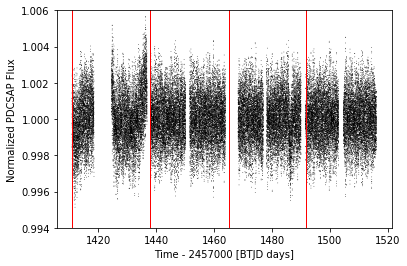

In [208]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

ax.scatter(t, f, s=0.5, c='k', edgecolor = '')

ax.set_ylim(0.994, 1.006)

ax.set_xlabel('Time - 2457000 [BTJD days]')
ax.set_ylabel('Normalized PDCSAP Flux')

[ax.axvline(_x, linewidth=1, color='red', linestyle='-', alpha=1) for _x in sectors]

plt.show()

fig.savefig('betaPic_lc_all.pdf', bbox_inches='tight')

In [125]:
t = comb(data4['TIME'], data5['TIME'], data6['TIME'], data7['TIME'])
f = comb(data4['PDCSAP_FLUX'], data5['PDCSAP_FLUX'], data6['PDCSAP_FLUX'], data7['PDCSAP_FLUX'])

In [129]:
sum(np.isnan(f))

6051

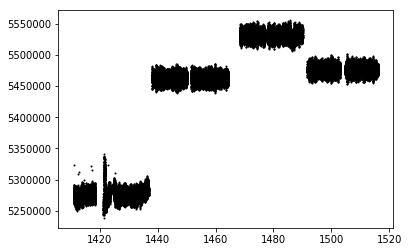

In [126]:
import matplotlib.pyplot as plt

plt.scatter(t, f, s=1, c='k')
plt.show()

In [106]:
data['TIME'][data['QUALITY']==128]

array([1437.98872175, 1437.99011066, 1437.99149957, 1441.09709999,
       1441.5832176 , 1441.59988448, 1444.04713633, 1444.0707477 ,
       1450.17635031])

In [44]:
mask0 = data['QUALITY'] == 128

In [45]:
data['TIME'][mask0]

array([1410.96047004, 1410.96880357, 1410.97019249, 1410.97158141,
       1410.97297034, 1410.97435926, 1410.9771371 , 1410.97852602,
       1410.99519309, 1410.99658201, 1410.99935985, 1411.00074877,
       1411.04797212, 1412.25216791, 1412.25911253, 1412.26605714,
       1412.26744606, 1412.27577959, 1412.27716852, 1412.27855744,
       1412.28550205, 1413.23969148, 1413.24108041, 1413.24246933,
       1413.24385825, 1413.24524717, 1413.24663609, 1413.24802501,
       1413.24941394, 1413.25080286, 1413.25219178, 1413.94804135,
       1413.94943027, 1413.95081919, 1413.95220811, 1413.95359703,
       1414.00637603, 1414.13276783, 1414.20082495, 1414.44527497,
       1414.93973058, 1416.94810742, 1416.94949633, 1416.95088525,
       1416.95227417, 1416.95366309, 1417.0008863 , 1417.00366413,
       1417.00505305, 1417.01894223, 1417.02033115, 1417.02172006,
       1417.02310898, 1417.02727574, 1417.07033219, 1417.08005461,
       1417.09255487, 1417.12033323, 1417.12727782, 1417.13005

In [25]:
mask0 = (1412.5 < t) & (t < 1413)

In [28]:
t[mask0]

array([1412.50078501, 1412.50217393, 1412.50356285, 1412.50495178,
       1412.5063407 , 1412.50772962, 1412.50911854, 1412.51050746,
       1412.51189639, 1412.51328531, 1412.51467423, 1412.51606315,
       1412.51745208, 1412.518841  , 1412.52022992, 1412.52161884,
       1412.52300776, 1412.52439669, 1412.52578561, 1412.52717453,
       1412.52856345, 1412.52995238, 1412.5313413 , 1412.53273022,
       1412.53411914, 1412.53550806, 1412.53689699, 1412.53828591,
       1412.53967483, 1412.54106375, 1412.54245268, 1412.5438416 ,
       1412.54523052, 1412.54661944, 1412.54800836, 1412.54939729,
       1412.55078621, 1412.55217513, 1412.55356405, 1412.55495298,
       1412.5563419 , 1412.55773082, 1412.55911974, 1412.56050866,
       1412.56189759, 1412.56328651, 1412.56467543, 1412.56606435,
       1412.56745328, 1412.5688422 , 1412.57023112, 1412.57162004,
       1412.57300896, 1412.57439789, 1412.57578681, 1412.57717573,
       1412.57856465, 1412.57995357, 1412.5813425 , 1412.58273

In [24]:
1412.5 < t

array([False, False, False, ...,  True,  True,  True])

In [23]:
def remove_nans(array):
    tmp_mask = np.isnan(array)
    return array[~tmp_mask]

t = remove_nans(data['TIME'])

In [12]:
data['TIME']

array([1410.90213532, 1410.90352425, 1410.90491317, ..., 1436.8484372 ,
       1436.8498261 , 1436.851215  ])

In [14]:
data['QUALITY']

8

In [30]:
len(data['TIME'])

18684

In [34]:
sum(~np.isnan(data['TIME']))

15973

In [36]:
sum(~np.isnan(data['QUALITY']))

18684